In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import folium
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [4]:
df_cas=pd.read_csv('iraste_nxt_cas.csv')
df_dms=pd.read_csv('iraste_nxt_casdms.csv')

In [5]:
df_cas.replace([np.inf, -np.inf], np.nan, inplace=True)
df_dms.replace([np.inf, -np.inf], np.nan, inplace=True)

In [6]:
df_cas["DateTime"]=df_cas["Date"]+' '+df_cas['Time']
df_dms["DateTime"]=df_dms["Date"]+' '+df_dms['Time']

In [7]:
df_cas

,Alert,Date,Time,Lat,Long,Vehicle,Speed,DateTime
0,cas_ldw,2022-05-01,00:00:06,14.196872,77.631213,3829.0,58,2022-05-01 00:00:06
1,cas_ldw,2022-05-01,00:00:07,16.511887,80.746034,8111.0,56,2022-05-01 00:00:07
2,cas_ldw,2022-05-01,00:00:11,17.908537,78.464064,1153.0,74,2022-05-01 00:00:11
3,cas_ldw,2022-05-01,00:00:11,13.152203,77.620431,7103.0,72,2022-05-01 00:00:11
4,cas_ldw,2022-05-01,00:00:15,16.512134,80.748452,8111.0,57,2022-05-01 00:00:15
...,...,...,...,...,...,...,...,...
1785504,cas_ldw,2022-05-30,23:51:58,21.137266,79.341276,1750.0,59,2022-05-30 23:51:58
1785505,cas_ldw,2022-05-30,23:52:22,21.137074,79.336862,1750.0,63,2022-05-30 23:52:22
1785506,cas_ldw,2022-05-30,23:52:34,21.137024,79.335337,1750.0,63,2022-05-30 23:52:34
1785507,cas_ldw,2022-05-30,23:54:14,21.136556,79.321972,1750.0,56,2022-05-30 23:54:14


In [8]:
df_dms

,Alert,Date,Time,Lat,Long,Vehicle,Speed,DateTime
0,cas_hmw,2022-05-01,00:00:29,17.158688,79.306623,3867,55,2022-05-01 00:00:29
1,cas_ldw,2022-05-01,00:00:52,17.158928,79.309335,3867,60,2022-05-01 00:00:52
2,cas_ldw,2022-05-01,00:01:03,17.159078,79.310747,3867,67,2022-05-01 00:01:03
3,cas_ldw,2022-05-01,00:01:16,17.159457,79.314245,3867,73,2022-05-01 00:01:16
4,cas_ldw,2022-05-01,00:01:27,16.814285,80.246173,6123,61,2022-05-01 00:01:27
...,...,...,...,...,...,...,...,...
60482,cas_ldw,2022-05-30,23:54:35,17.144550,79.600310,6123,79,2022-05-30 23:54:35
60483,cas_ldw,2022-05-30,23:56:21,17.153962,79.609060,6123,60,2022-05-30 23:56:21
60484,cas_ldw,2022-05-30,23:56:37,17.155207,79.611777,6123,60,2022-05-30 23:56:37
60485,cas_ldw,2022-05-30,23:56:49,17.155805,79.613217,6123,57,2022-05-30 23:56:49


In [9]:
df_cas.dropna(inplace=True)
df_dms.dropna(inplace=True)

In [10]:
df_dms

,Alert,Date,Time,Lat,Long,Vehicle,Speed,DateTime
0,cas_hmw,2022-05-01,00:00:29,17.158688,79.306623,3867,55,2022-05-01 00:00:29
1,cas_ldw,2022-05-01,00:00:52,17.158928,79.309335,3867,60,2022-05-01 00:00:52
2,cas_ldw,2022-05-01,00:01:03,17.159078,79.310747,3867,67,2022-05-01 00:01:03
3,cas_ldw,2022-05-01,00:01:16,17.159457,79.314245,3867,73,2022-05-01 00:01:16
4,cas_ldw,2022-05-01,00:01:27,16.814285,80.246173,6123,61,2022-05-01 00:01:27
...,...,...,...,...,...,...,...,...
60482,cas_ldw,2022-05-30,23:54:35,17.144550,79.600310,6123,79,2022-05-30 23:54:35
60483,cas_ldw,2022-05-30,23:56:21,17.153962,79.609060,6123,60,2022-05-30 23:56:21
60484,cas_ldw,2022-05-30,23:56:37,17.155207,79.611777,6123,60,2022-05-30 23:56:37
60485,cas_ldw,2022-05-30,23:56:49,17.155805,79.613217,6123,57,2022-05-30 23:56:49


In [11]:
df_cas.drop(['Date','Time'],axis=1,inplace=True)
df_dms.drop(['Date','Time'],axis=1,inplace=True)

In [12]:
df_cas['DateTime'] = pd.to_datetime(df_cas['DateTime'])
df_cas['Hour']=df_cas['DateTime'].dt.hour
df_dms['DateTime'] = pd.to_datetime(df_dms['DateTime'])
df_dms['Hour']=df_dms['DateTime'].dt.hour

In [13]:
df_cas["days of week"]=df_cas['DateTime'].dt.dayofweek
df_dms["days of week"]=df_dms['DateTime'].dt.dayofweek

In [14]:
df_cas["isnight"]=(df_cas['Hour']>18) | (df_cas['Hour']<6)
df_dms["isnight"]=(df_cas['Hour']>18) | (df_cas['Hour']<6)

In [15]:
for col in df_cas.columns:
    print(col)

Alert
Lat
Long
Vehicle
Speed
DateTime
Hour
days of week
isnight


In [16]:
df_dms

,Alert,Lat,Long,Vehicle,Speed,DateTime,Hour,days of week,isnight
0,cas_hmw,17.158688,79.306623,3867,55,2022-05-01 00:00:29,0,6,True
1,cas_ldw,17.158928,79.309335,3867,60,2022-05-01 00:00:52,0,6,True
2,cas_ldw,17.159078,79.310747,3867,67,2022-05-01 00:01:03,0,6,True
3,cas_ldw,17.159457,79.314245,3867,73,2022-05-01 00:01:16,0,6,True
4,cas_ldw,16.814285,80.246173,6123,61,2022-05-01 00:01:27,0,6,True
...,...,...,...,...,...,...,...,...,...
60482,cas_ldw,17.144550,79.600310,6123,79,2022-05-30 23:54:35,23,0,False
60483,cas_ldw,17.153962,79.609060,6123,60,2022-05-30 23:56:21,23,0,False
60484,cas_ldw,17.155207,79.611777,6123,60,2022-05-30 23:56:37,23,0,False
60485,cas_ldw,17.155805,79.613217,6123,57,2022-05-30 23:56:49,23,0,False


# Distribution of alert

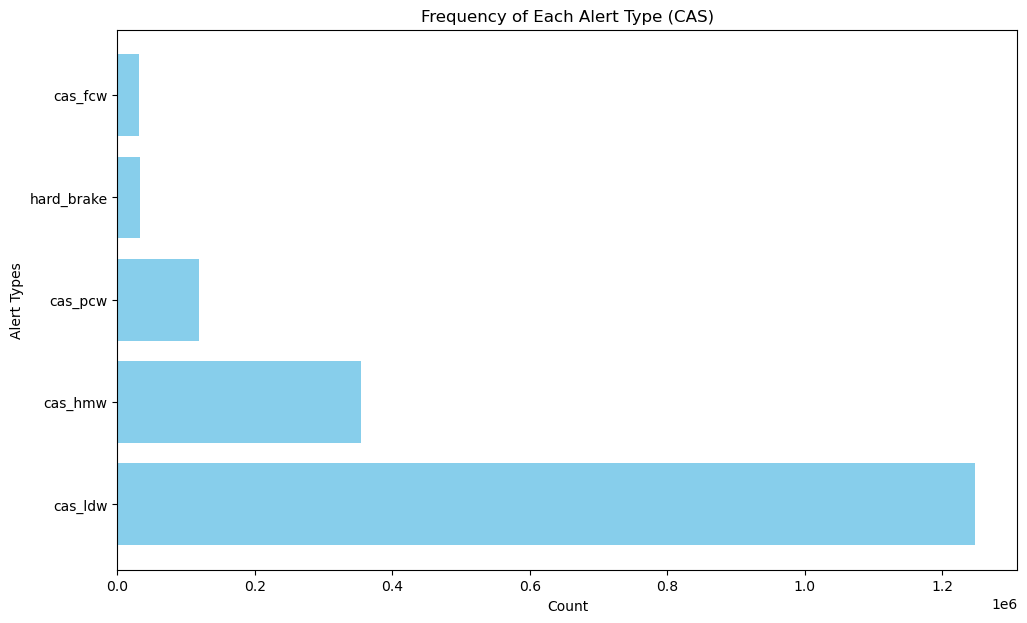

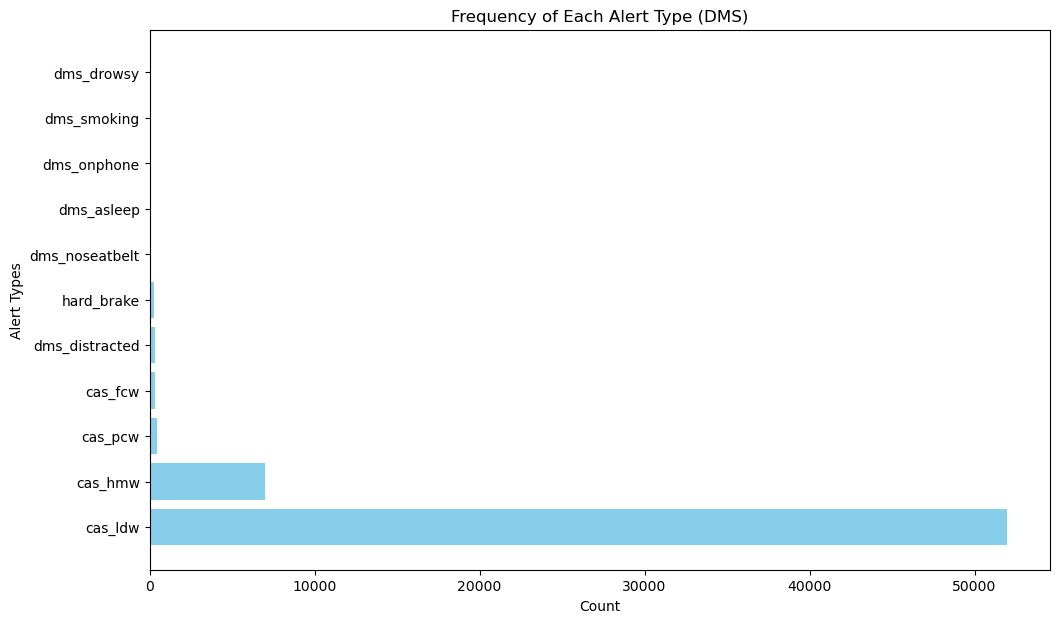

In [17]:
import matplotlib.pyplot as plt

# Collision Alert System (CAS) Alerts Frequency
alert_count = df_cas['Alert'].value_counts()
fig1 = plt.figure(figsize=(10, 6))
axes1 = fig1.add_axes([0.1, 0.1, 0.9, 0.9])
axes1.barh(alert_count.index, alert_count.values, color='skyblue')
axes1.set_xlabel("Count")
axes1.set_ylabel("Alert Types")
axes1.set_title("Frequency of Each Alert Type (CAS)")
plt.show()

# Driver Monitoring System (DMS) Alerts Frequency
alert_count1 = df_dms['Alert'].value_counts()
fig2 = plt.figure(figsize=(10, 6))
axes2 = fig2.add_axes([0.1, 0.1, 0.9, 0.9])
axes2.barh(alert_count1.index, alert_count1.values, color='skyblue')
axes2.set_xlabel("Count")
axes2.set_ylabel("Alert Types")
axes2.set_title("Frequency of Each Alert Type (DMS)")
plt.show()


# Analysis event Timeings

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


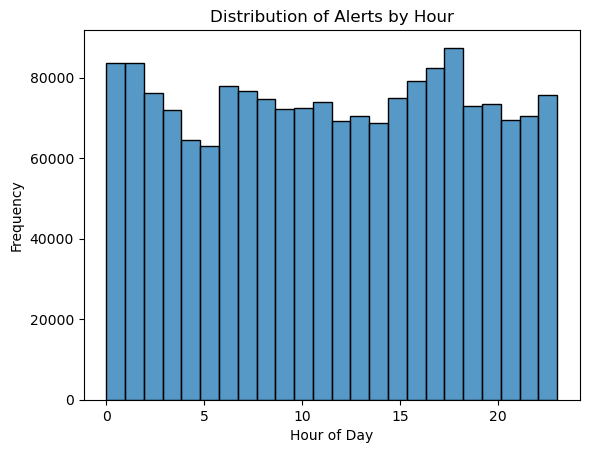

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


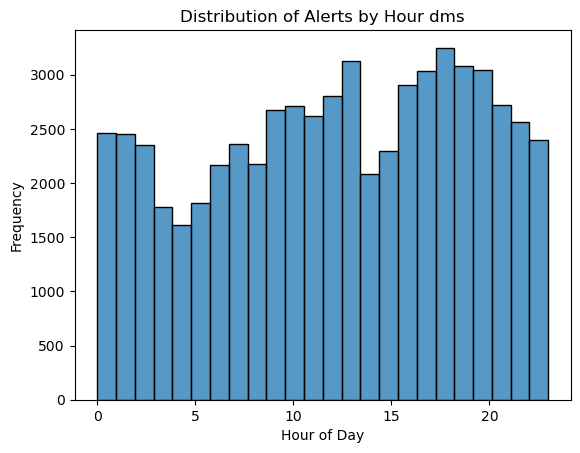

In [18]:
sns.histplot(df_cas['Hour'], bins=24, edgecolor='k')
plt.title('Distribution of Alerts by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.show()
sns.histplot(df_dms['Hour'], bins=24, edgecolor='k')
plt.title('Distribution of Alerts by Hour dms')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.show()

# vahical speed analysis

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


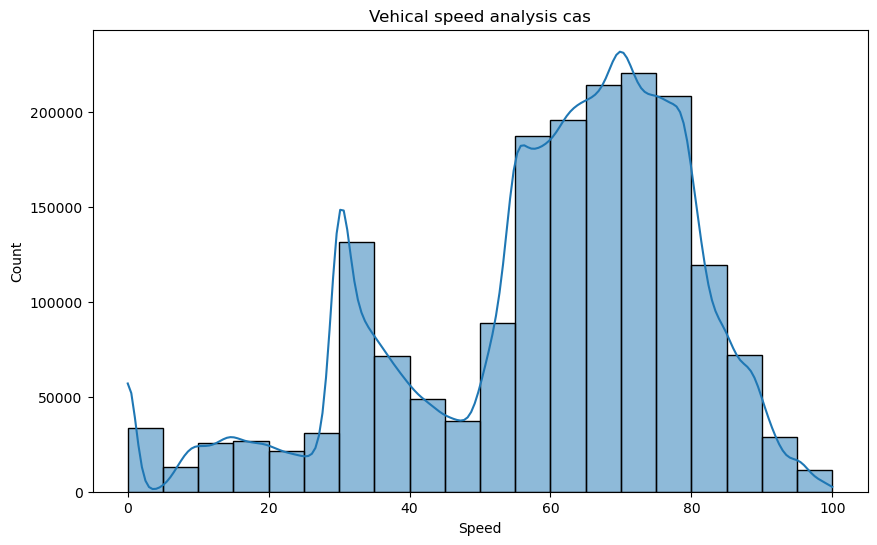

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


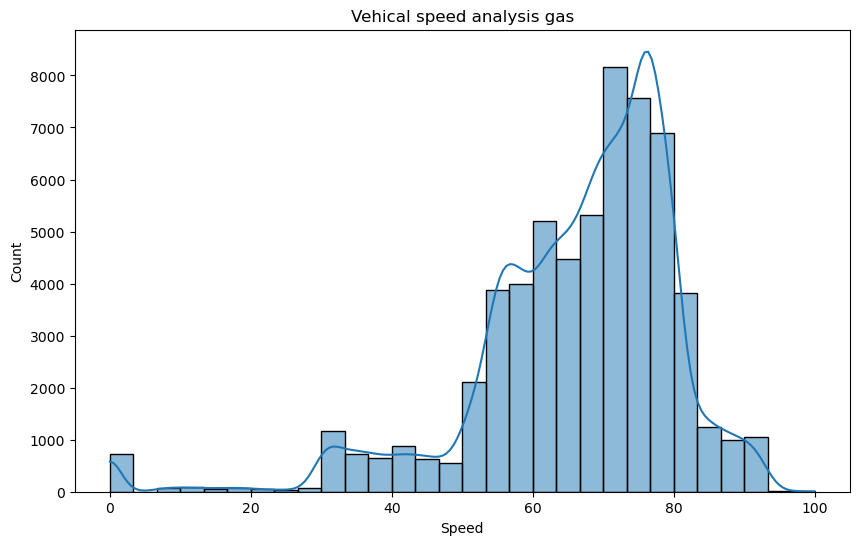

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(df_cas['Speed'],bins=20,kde=True)
plt.title("Vehical speed analysis cas")
plt.show()
plt.figure(figsize=(10,6))
sns.histplot(df_dms['Speed'],bins=30,kde=True)
plt.title("Vehical speed analysis gas")
plt.show()

# Merging

In [20]:
dataframs=[df_cas,df_dms]
df=pd.concat(dataframs)

# speed vs alert

In [21]:
df

,Alert,Lat,Long,Vehicle,Speed,DateTime,Hour,days of week,isnight
0,cas_ldw,14.196872,77.631213,3829.0,58,2022-05-01 00:00:06,0,6,True
1,cas_ldw,16.511887,80.746034,8111.0,56,2022-05-01 00:00:07,0,6,True
2,cas_ldw,17.908537,78.464064,1153.0,74,2022-05-01 00:00:11,0,6,True
3,cas_ldw,13.152203,77.620431,7103.0,72,2022-05-01 00:00:11,0,6,True
4,cas_ldw,16.512134,80.748452,8111.0,57,2022-05-01 00:00:15,0,6,True
...,...,...,...,...,...,...,...,...,...
60482,cas_ldw,17.144550,79.600310,6123.0,79,2022-05-30 23:54:35,23,0,False
60483,cas_ldw,17.153962,79.609060,6123.0,60,2022-05-30 23:56:21,23,0,False
60484,cas_ldw,17.155207,79.611777,6123.0,60,2022-05-30 23:56:37,23,0,False
60485,cas_ldw,17.155805,79.613217,6123.0,57,2022-05-30 23:56:49,23,0,False


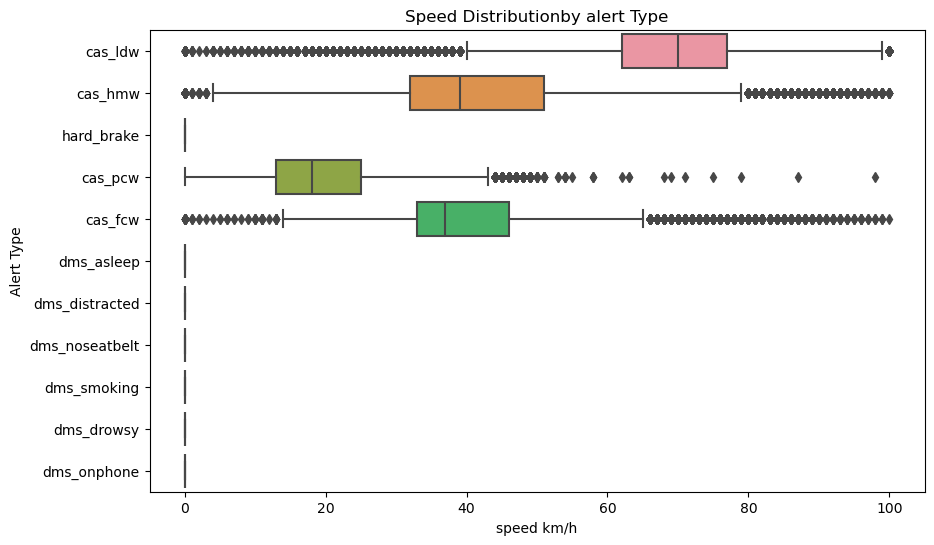

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Speed',y='Alert',data=df)
plt.title('Speed Distributionby alert Type')
plt.xlabel("speed km/h")
plt.ylabel("Alert Type")
plt.show()

# map view

In [23]:

import folium

# Filter the DataFrame for 'cas_ldw' alerts only
cas_ldw_data = df_cas[df_cas['Alert'] == 'cas_pcw']

# Create a map centered at the average location of the filtered data
if not cas_ldw_data.empty:
    map_center = [cas_ldw_data['Lat'].mean(), cas_ldw_data['Long'].mean()]
    m = folium.Map(location=map_center, zoom_start=10)

    # Sample a subset of the filtered data to avoid overloading the map
    sampled_data = cas_ldw_data.sample(n=1000, random_state=42) if len(cas_ldw_data) > 1000 else cas_ldw_data

    for idx, row in sampled_data.iterrows():
        folium.Marker([row['Lat'], row['Long']], popup=row['Alert']).add_to(m)

m

# Speed Analysis by Alert Type

In [24]:
df

,Alert,Lat,Long,Vehicle,Speed,DateTime,Hour,days of week,isnight
0,cas_ldw,14.196872,77.631213,3829.0,58,2022-05-01 00:00:06,0,6,True
1,cas_ldw,16.511887,80.746034,8111.0,56,2022-05-01 00:00:07,0,6,True
2,cas_ldw,17.908537,78.464064,1153.0,74,2022-05-01 00:00:11,0,6,True
3,cas_ldw,13.152203,77.620431,7103.0,72,2022-05-01 00:00:11,0,6,True
4,cas_ldw,16.512134,80.748452,8111.0,57,2022-05-01 00:00:15,0,6,True
...,...,...,...,...,...,...,...,...,...
60482,cas_ldw,17.144550,79.600310,6123.0,79,2022-05-30 23:54:35,23,0,False
60483,cas_ldw,17.153962,79.609060,6123.0,60,2022-05-30 23:56:21,23,0,False
60484,cas_ldw,17.155207,79.611777,6123.0,60,2022-05-30 23:56:37,23,0,False
60485,cas_ldw,17.155805,79.613217,6123.0,57,2022-05-30 23:56:49,23,0,False


In [25]:
alerttypes=df['Alert'].unique()
print(alerttypes)

['cas_ldw' 'cas_hmw' 'hard_brake' 'cas_pcw' 'cas_fcw' 'dms_asleep'
 'dms_distracted' 'dms_noseatbelt' 'dms_smoking' 'dms_drowsy'
 'dms_onphone']


In [26]:
cas_alert=['cas_ldw','cas_hmw','cas_pcw','cas_fcw']
dms_alert=['dms_asleep','dms_distracted', 'dms_noseatbelt' ,'dms_smoking', 'dms_drowsy','dms_onphone','hard_brake']
cas_data=df[df['Alert'].isin(cas_alert)]
dms_data=df[df['Alert'].isin(dms_alert)]
print("cas_alert")
for alert in cas_alert:
    alertdata=cas_data[cas_data['Alert']==alert]
    print(f"\n{alert} Analysis")
    print(cas_data['Speed'].mean(),"km/h")
    print(f"Total occurence:{alertdata.shape[0]}")
print("\ndms")
for alert in dms_alert:
    alertdata=dms_data[dms_data['Alert']==alert]
    print(f"\n{alert} Analysis")
    print(dms_data['Speed'].mean(),"km/h")
    print(f"Total occurence:{alertdata.shape[0]}")

cas_alert

cas_ldw Analysis
60.748414624728326 km/h
Total occurence:1299192

cas_hmw Analysis
60.748414624728326 km/h
Total occurence:361864

cas_pcw Analysis
60.748414624728326 km/h
Total occurence:119525

cas_fcw Analysis
60.748414624728326 km/h
Total occurence:32239

dms

dms_asleep Analysis
0.0 km/h
Total occurence:43

dms_distracted Analysis
0.0 km/h
Total occurence:328

dms_noseatbelt Analysis
0.0 km/h
Total occurence:71

dms_smoking Analysis
0.0 km/h
Total occurence:4

dms_drowsy Analysis
0.0 km/h
Total occurence:1

dms_onphone Analysis
0.0 km/h
Total occurence:6

hard_brake Analysis
0.0 km/h
Total occurence:32722


In [27]:
df['Speed']

0        58
1        56
2        74
3        72
4        57
         ..
60482    79
60483    60
60484    60
60485    57
60486    63
Name: Speed, Length: 1845995, dtype: int64

# Correlation and Causation Investigation

In [28]:
df

,Alert,Lat,Long,Vehicle,Speed,DateTime,Hour,days of week,isnight
0,cas_ldw,14.196872,77.631213,3829.0,58,2022-05-01 00:00:06,0,6,True
1,cas_ldw,16.511887,80.746034,8111.0,56,2022-05-01 00:00:07,0,6,True
2,cas_ldw,17.908537,78.464064,1153.0,74,2022-05-01 00:00:11,0,6,True
3,cas_ldw,13.152203,77.620431,7103.0,72,2022-05-01 00:00:11,0,6,True
4,cas_ldw,16.512134,80.748452,8111.0,57,2022-05-01 00:00:15,0,6,True
...,...,...,...,...,...,...,...,...,...
60482,cas_ldw,17.144550,79.600310,6123.0,79,2022-05-30 23:54:35,23,0,False
60483,cas_ldw,17.153962,79.609060,6123.0,60,2022-05-30 23:56:21,23,0,False
60484,cas_ldw,17.155207,79.611777,6123.0,60,2022-05-30 23:56:37,23,0,False
60485,cas_ldw,17.155805,79.613217,6123.0,57,2022-05-30 23:56:49,23,0,False


In [29]:
df['isnight'] = df['isnight'].astype(int)
from scipy.stats import pearsonr

# Correlation between 'Speed' and 'Hour'
speed_hour_correlation, speed_hour_pvalue = pearsonr(df['Speed'], df['Hour'])
print(f"Correlation between Speed and Hour: {speed_hour_correlation:.2f}, P-value: {speed_hour_pvalue:.4f}")

# Correlation between 'Speed' and 'days of week'
speed_dow_correlation, speed_dow_pvalue = pearsonr(df['Speed'], df['days of week'])
print(f"Correlation between Speed and Days of Week: {speed_dow_correlation:.2f}, P-value: {speed_dow_pvalue:.4f}")

# Correlation between 'Speed' and 'isnight'
speed_isnight_correlation, speed_isnight_pvalue = pearsonr(df['Speed'], df['isnight'])
print(f"Correlation between Speed and IsNight: {speed_isnight_correlation:.2f}, P-value: {speed_isnight_pvalue:.4f}")


Correlation between Speed and Hour: -0.14, P-value: 0.0000
Correlation between Speed and Days of Week: -0.02, P-value: 0.0000
Correlation between Speed and IsNight: 0.21, P-value: 0.0000


# Visualizing Correlations

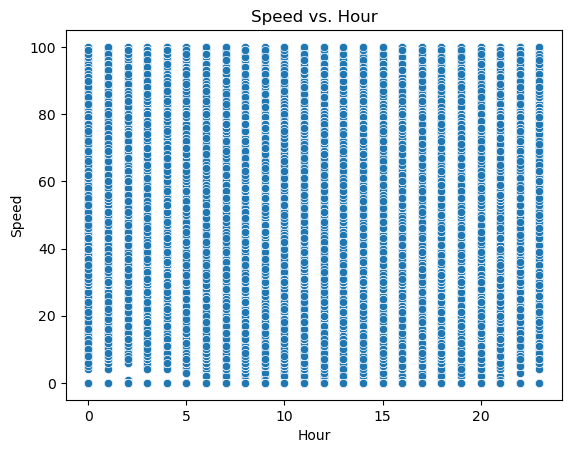

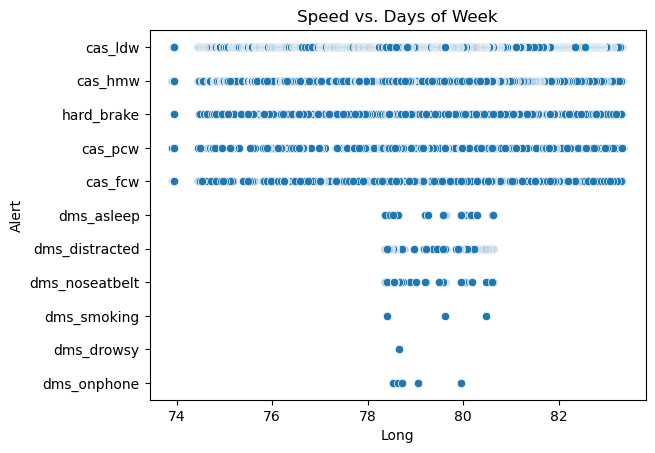

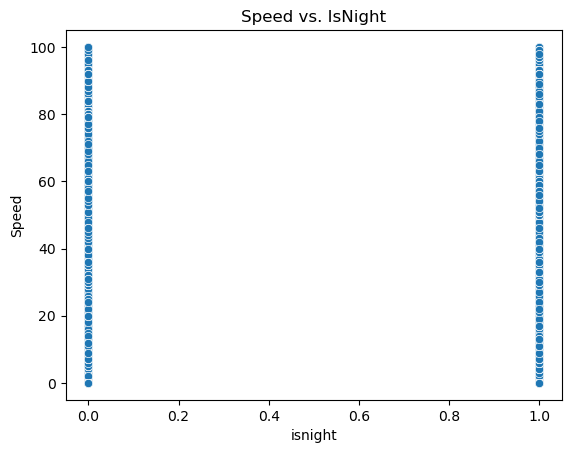

In [30]:
# Scatter plot for Speed vs. Hour

sns.scatterplot(x=df['Hour'], y=df['Speed'])
plt.title('Speed vs. Hour')
plt.show()

# Scatter plot for Speed vs. Days of Week
sns.scatterplot(x=df['Long'], y=df['Alert'])
plt.title('Speed vs. Days of Week')
plt.show()

# Scatter plot for Speed vs. IsNight
sns.scatterplot(x=df['isnight'], y=df['Speed'])
plt.title('Speed vs. IsNight')
plt.show()


# visul by cas ldw

In [31]:
# Define the function to categorize time of day
def categorize_time_of_day(hour):
    if 0 <= hour < 3:
        return 'Late Night'
    elif 3 <= hour < 6:
        return 'Early Morning'
    elif 6 <= hour < 9:
        return 'Morning'
    elif 9 <= hour < 12:
        return 'Late Morning'
    elif 12 <= hour < 15:
        return 'Early Afternoon'
    elif 15 <= hour < 18:
        return 'Late Afternoon'
    elif 18 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create the 'TimeOfDay' column
df['TimeOfDay'] = df['Hour'].apply(categorize_time_of_day)


alertdata


,Alert,Lat,Long,Vehicle,Speed,DateTime,Hour,days of week,isnight
31,hard_brake,13.229924,77.690456,2173.0,0,2022-05-01 00:01:31,0,6,True
139,hard_brake,16.081347,79.929037,9501.0,0,2022-05-01 00:07:19,0,6,True
424,hard_brake,16.773655,80.289562,9857.0,0,2022-05-01 00:18:10,0,6,True
592,hard_brake,17.603382,78.491064,8113.0,0,2022-05-01 00:22:44,0,6,True
665,hard_brake,17.229727,79.080061,6152.0,0,2022-05-01 00:24:55,0,6,True
...,...,...,...,...,...,...,...,...,...
58656,hard_brake,17.153662,79.619895,8877.0,0,2022-05-29 11:02:06,11,6,False
58836,hard_brake,16.639018,80.433520,8877.0,0,2022-05-29 13:32:54,13,6,False
59789,hard_brake,17.060383,79.821978,8877.0,0,2022-05-30 11:37:04,11,0,False
59823,hard_brake,16.966342,80.031812,8877.0,0,2022-05-30 12:11:39,12,0,False


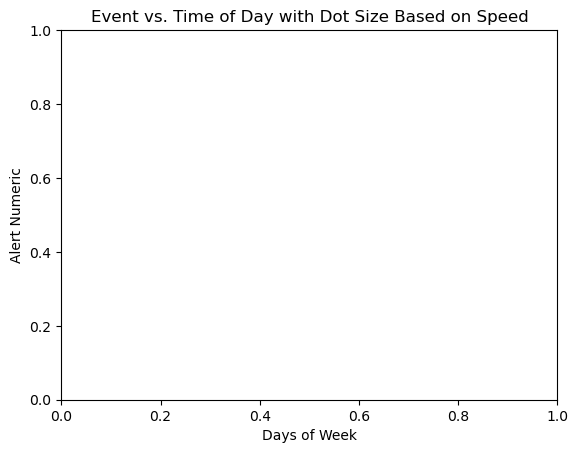

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Alert' to a numeric value if it's categorical, for plotting purposes
#df['AlertNumeric'] = df['Alert'].astype('category').cat.codes

# Create a scatter plot with varying dot sizes based on 'Speed'
#sns.scatterplot(data=df, x='Hour', y='AlertNumeric', size='Speed', sizes=(20, 200), legend=False)

# Set the title and labels of the plot
plt.title('Event vs. Time of Day with Dot Size Based on Speed')
plt.xlabel('Days of Week')
plt.ylabel('Alert Numeric')

# Show the plot
plt.show()


# Geograpical correlation

<Axes: xlabel='Long', ylabel='Lat'>

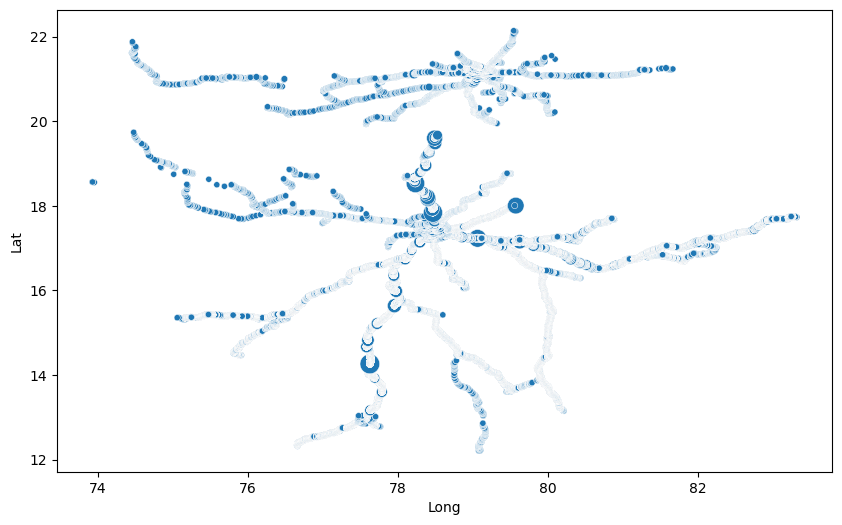

In [33]:
geo=df.groupby(['Lat','Long','Alert']).size().reset_index(name='count')
few=geo[geo['Alert']=='cas_ldw']
plt.figure(figsize=(10,6))
sns.scatterplot(data=few,x='Long',y='Lat',size='count',legend=False,sizes=(20,200))

# k means

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecting only the geographical coordinates for clustering
coordinates = df[['Lat', 'Long']]

# Number of clusters can be chosen based on domain knowledge, or using methods like the Elbow Method
model = KMeans(n_clusters=4, n_init=10)

# Compute k-means clustering
model.fit(coordinates)


KMeans(n_clusters=4, n_init=10)

In [35]:
pred=model.predict(coordinates)

In [36]:
model.cluster_centers_

array([[17.40340724, 78.55912521],
       [21.13184886, 79.07298426],
       [16.84441463, 80.247111  ],
       [14.54728976, 77.87224567]])

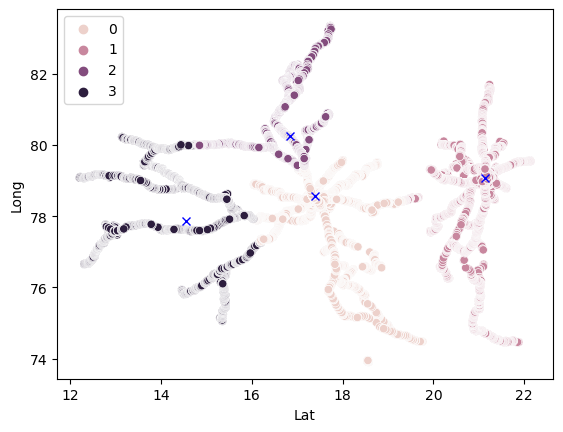

In [37]:
sns.scatterplot(data=coordinates,x='Lat',y='Long',hue=pred)
centers_x, centers_y = model.cluster_centers_[:,0], model.cluster_centers_[:,1]
plt.plot(centers_x, centers_y,"xb")

In [38]:
df['Cluster_Label'] = model.labels_

In [39]:
cluster_data_0 = df[df['Cluster_Label'] == 0]
cluster_data_1 = df[df['Cluster_Label'] == 1]
cluster_data_2 = df[df['Cluster_Label'] == 2]
cluster_data_3 = df[df['Cluster_Label'] == 3]

In [40]:
model.inertia_

1157356.960768086

In [41]:
#option=range(2,11)
#inertias=[]
#for n_clusters in option:
 #   model = KMeans(n_clusters, n_init=10).fit(coordinates)
#    inertias.append(model.inertia_)
#plt.title("No of cluster vs inertia")
#plt.plot(option,inertias,'-o')
#plt.xlabel("k value")
#plt.ylabel("i")

# time based alert

In [42]:
df

,Alert,Lat,Long,Vehicle,Speed,DateTime,Hour,days of week,isnight,TimeOfDay,Cluster_Label
0,cas_ldw,14.196872,77.631213,3829.0,58,2022-05-01 00:00:06,0,6,1,Late Night,3
1,cas_ldw,16.511887,80.746034,8111.0,56,2022-05-01 00:00:07,0,6,1,Late Night,2
2,cas_ldw,17.908537,78.464064,1153.0,74,2022-05-01 00:00:11,0,6,1,Late Night,0
3,cas_ldw,13.152203,77.620431,7103.0,72,2022-05-01 00:00:11,0,6,1,Late Night,3
4,cas_ldw,16.512134,80.748452,8111.0,57,2022-05-01 00:00:15,0,6,1,Late Night,2
...,...,...,...,...,...,...,...,...,...,...,...
60482,cas_ldw,17.144550,79.600310,6123.0,79,2022-05-30 23:54:35,23,0,0,Night,2
60483,cas_ldw,17.153962,79.609060,6123.0,60,2022-05-30 23:56:21,23,0,0,Night,2
60484,cas_ldw,17.155207,79.611777,6123.0,60,2022-05-30 23:56:37,23,0,0,Night,2
60485,cas_ldw,17.155805,79.613217,6123.0,57,2022-05-30 23:56:49,23,0,0,Night,2


In [43]:
hours=(12,11)

In [44]:
hours=df[df['Hour'].isin(hours)]

In [45]:
hours

,Alert,Lat,Long,Vehicle,Speed,DateTime,Hour,days of week,isnight,TimeOfDay,Cluster_Label
17347,cas_ldw,17.945934,78.467058,6102.0,79,2022-05-01 11:00:04,11,6,0,Late Morning,0
17348,cas_ldw,17.111823,79.672770,4123.0,67,2022-05-01 11:00:05,11,6,0,Late Morning,2
17349,cas_ldw,15.550573,77.926288,3889.0,70,2022-05-01 11:00:10,11,6,0,Late Morning,3
17350,cas_ldw,16.690645,80.376436,8143.0,69,2022-05-01 11:00:13,11,6,0,Late Morning,2
17351,cas_pcw,16.998822,79.963755,7143.0,16,2022-05-01 11:00:13,11,6,0,Late Morning,2
...,...,...,...,...,...,...,...,...,...,...,...
59936,cas_ldw,17.197577,79.204573,6123.0,72,2022-05-30 12:57:41,12,0,0,Early Afternoon,0
59937,cas_ldw,17.195993,79.199308,6123.0,68,2022-05-30 12:58:10,12,0,0,Early Afternoon,0
59938,cas_ldw,16.717233,80.328188,8877.0,74,2022-05-30 12:58:33,12,0,0,Early Afternoon,2
59939,cas_ldw,16.716457,80.330077,8877.0,65,2022-05-30 12:58:43,12,0,0,Early Afternoon,2


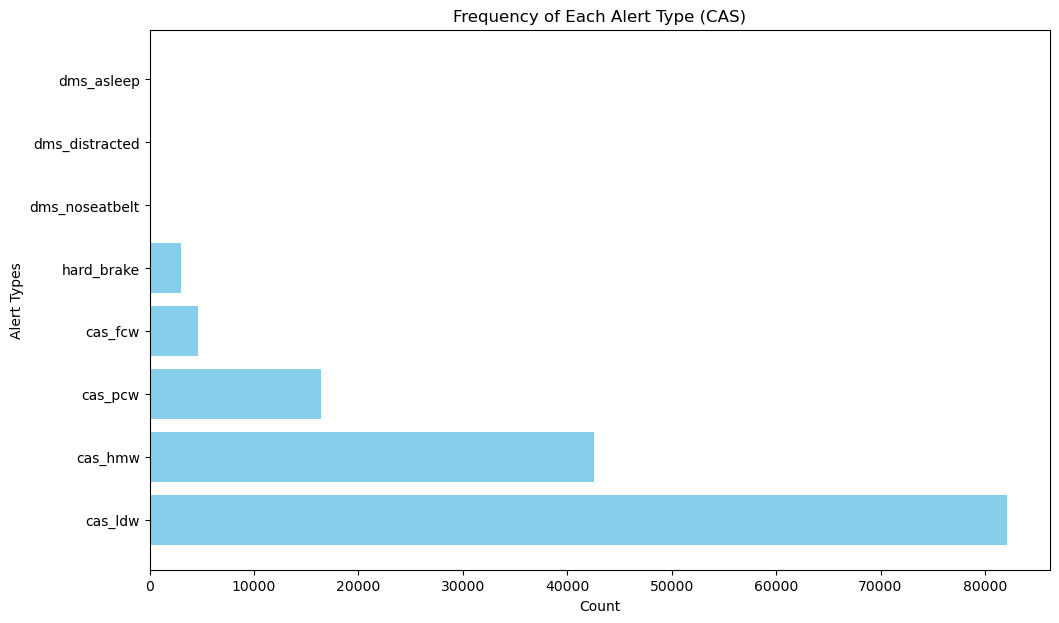

In [46]:
alert_count = hours['Alert'].value_counts()
fig3= plt.figure(figsize=(10, 6))
axe3 = fig3.add_axes([0.1, 0.1, 0.9, 0.9])
axe3.barh(alert_count.index, alert_count.values, color='skyblue')
axe3.set_xlabel("Count")
axe3.set_ylabel("Alert Types")
axe3.set_title("Frequency of Each Alert Type (CAS)")
plt.show()

In [47]:
mapcenter=[cluster_data_0['Lat'].mean(),cluster_data_0['Long'].mean()]
m=folium.Map(location=mapcenter,zoom_start=10)

sampled_data = cluster_data_0.sample(n=1000, random_state=42)
for idx, row in sampled_data.iterrows():
    folium.Marker([row['Lat'], row['Long']], popup=row['Alert']).add_to(m)
m

In [48]:
centerpoint=model.cluster_centers_
centerpoint

array([[17.40340724, 78.55912521],
       [21.13184886, 79.07298426],
       [16.84441463, 80.247111  ],
       [14.54728976, 77.87224567]])

In [49]:
location={
    "Lan":centerpoint[:,0],
    "long":centerpoint[:,1]
}

In [50]:
location=pd.DataFrame(location)

In [51]:
location

,Lan,long
0,17.403407,78.559125
1,21.131849,79.072984
2,16.844415,80.247111
3,14.547290,77.872246


In [52]:
import folium


map_center = [location['Lan'].mean(), location['long'].mean()]
m = folium.Map(location=map_center, zoom_start=10)


sampled_data = location.sample(n=4, random_state=42)
for idx, row in sampled_data.iterrows():
    # Assuming you want to show the index of the location in the popup
    folium.Marker([row['Lan'], row['long']], popup=str(idx)).add_to(m)


m


# Nagpur Frequency of Each Alert Type  

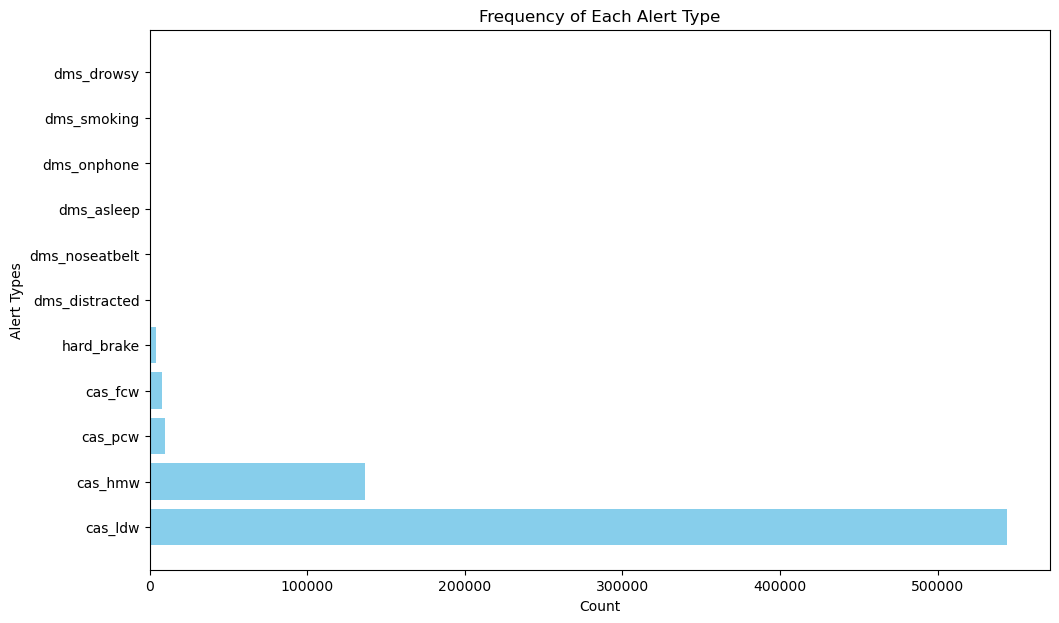

In [53]:
alert_count2 = cluster_data_0['Alert'].value_counts()
fig5 = plt.figure(figsize=(10, 6))
axes5 = fig5.add_axes([0.1, 0.1, 0.9, 0.9])
axes5.barh(alert_count2.index, alert_count2.values, color='skyblue')
axes5.set_xlabel("Count")
axes5.set_ylabel("Alert Types")
axes5.set_title("Frequency of Each Alert Type")
plt.show()

# Hyderabad Frequency of Each Alert Type

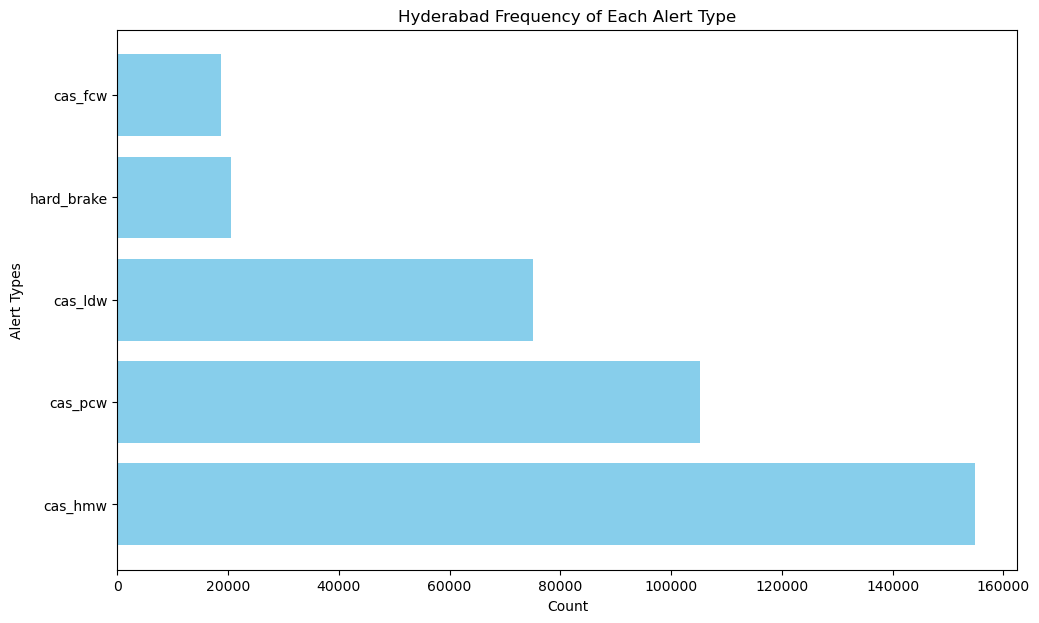

In [54]:
alert_count3 = cluster_data_1['Alert'].value_counts()
fig6 = plt.figure(figsize=(10, 6))
axes6 = fig6.add_axes([0.1, 0.1, 0.9, 0.9])
axes6.barh(alert_count3.index, alert_count3.values, color='skyblue')
axes6.set_xlabel("Count")
axes6.set_ylabel("Alert Types")
axes6.set_title("Hyderabad Frequency of Each Alert Type")
plt.show()

# Anantapur(AP) Frequency of Each Alert Type

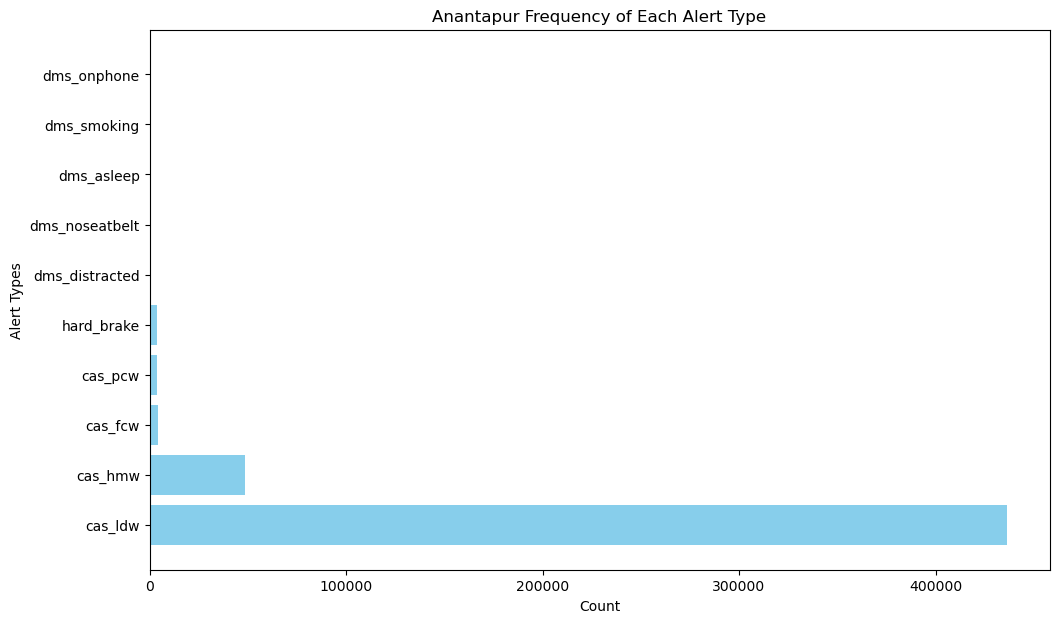

In [55]:
alert_count4 = cluster_data_2['Alert'].value_counts()
fig6 = plt.figure(figsize=(10, 6))
axes6 = fig6.add_axes([0.1, 0.1, 0.9, 0.9])
axes6.barh(alert_count4.index, alert_count4.values, color='skyblue')
axes6.set_xlabel("Count")
axes6.set_ylabel("Alert Types")
axes6.set_title("Anantapur Frequency of Each Alert Type")
plt.show()

# Nandigama(Vijayawada) Frequency of Each Alert Type

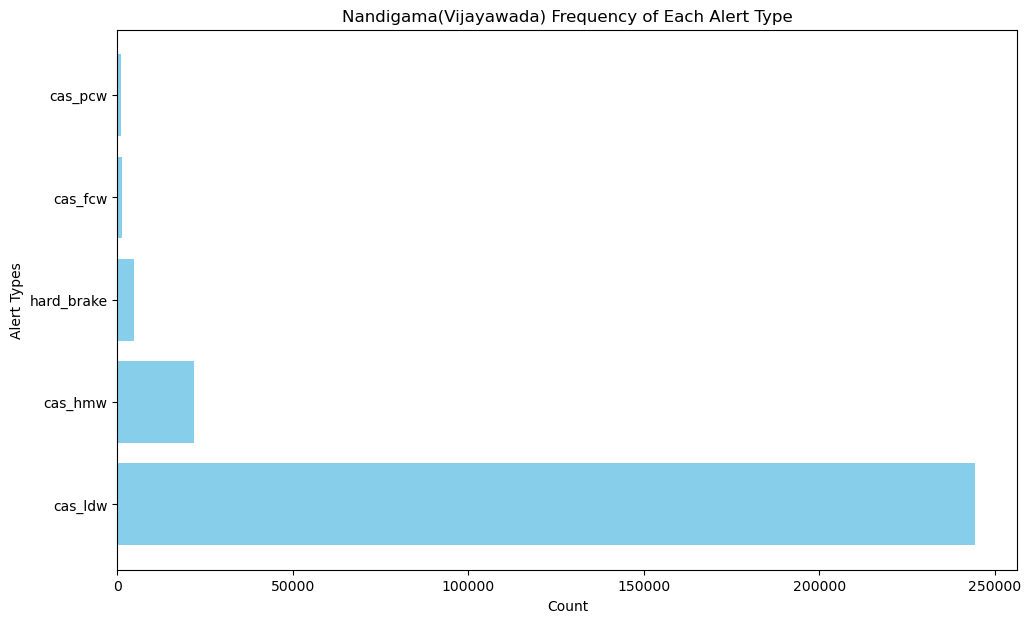

In [56]:
alert_count21 = cluster_data_3['Alert'].value_counts()
fig7 = plt.figure(figsize=(10, 6))
axes7 = fig7.add_axes([0.1, 0.1, 0.9, 0.9])
axes7.barh(alert_count21.index, alert_count21.values, color='skyblue')
axes7.set_xlabel("Count")
axes7.set_ylabel("Alert Types")
axes7.set_title("Nandigama(Vijayawada) Frequency of Each Alert Type")
plt.show()

In [57]:
print(cluster_data_0.shape)
print(cluster_data_1.shape)
print(cluster_data_2.shape)
print(cluster_data_3.shape)

(702276, 11)
(374308, 11)
(496390, 11)
(273021, 11)


In [58]:
for com in df.columns:
    print(com)

Alert
Lat
Long
Vehicle
Speed
DateTime
Hour
days of week
isnight
TimeOfDay
Cluster_Label


In [59]:

alert_freq_cluster_0 = cluster_data_0['Alert'].value_counts()
print("Frequency of each alert type in cluster 0:\n", alert_freq_cluster_0)


alert_freq_cluster_1 = cluster_data_1['Alert'].value_counts()
print("Frequency of each alert type in cluster 1:\n", alert_freq_cluster_1)

alert_freq_cluster_2 = cluster_data_2['Alert'].value_counts()
print("Frequency of each alert type in cluster 2:\n", alert_freq_cluster_2)

alert_freq_cluster_3 = cluster_data_3['Alert'].value_counts()
print("Frequency of each alert type in cluster 3:\n", alert_freq_cluster_3)

Frequency of each alert type in cluster 0:
 Alert
cas_ldw           543693
cas_hmw           136664
cas_pcw             9628
cas_fcw             8083
hard_brake          3953
dms_distracted       180
dms_noseatbelt        46
dms_asleep            21
dms_onphone            5
dms_smoking            2
dms_drowsy             1
Name: count, dtype: int64
Frequency of each alert type in cluster 1:
 Alert
cas_hmw       154799
cas_pcw       105248
cas_ldw        75081
hard_brake     20522
cas_fcw        18658
Name: count, dtype: int64
Frequency of each alert type in cluster 2:
 Alert
cas_ldw           436196
cas_hmw            48556
cas_fcw             4181
cas_pcw             3666
hard_brake          3593
dms_distracted       148
dms_noseatbelt        25
dms_asleep            22
dms_smoking            2
dms_onphone            1
Name: count, dtype: int64
Frequency of each alert type in cluster 3:
 Alert
cas_ldw       244222
cas_hmw        21845
hard_brake      4654
cas_fcw         1317
cas_pcw 

In [60]:
cluster_data_0['cas_ldw_code'] = np.where(cluster_data_0['Alert'] == 'cas_ldw', 1, 0)


correlation, p_value = pearsonr(cluster_data_0['cas_ldw_code'], cluster_data_0['Speed'])

print(f"Correlation between 'cas_ldw' alerts and Speed in cluster 0: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

Correlation between 'cas_ldw' alerts and Speed in cluster 0: 0.677
P-value: 0.000


C:\Users\USER\AppData\Local\Temp\ipykernel_6260\234268196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data_0['cas_ldw_code'] = np.where(cluster_data_0['Alert'] == 'cas_ldw', 1, 0)


C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


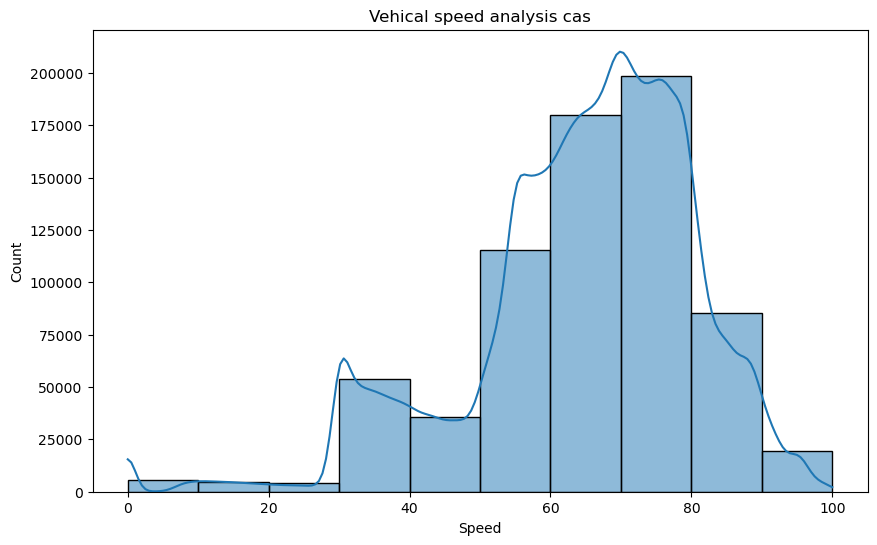

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


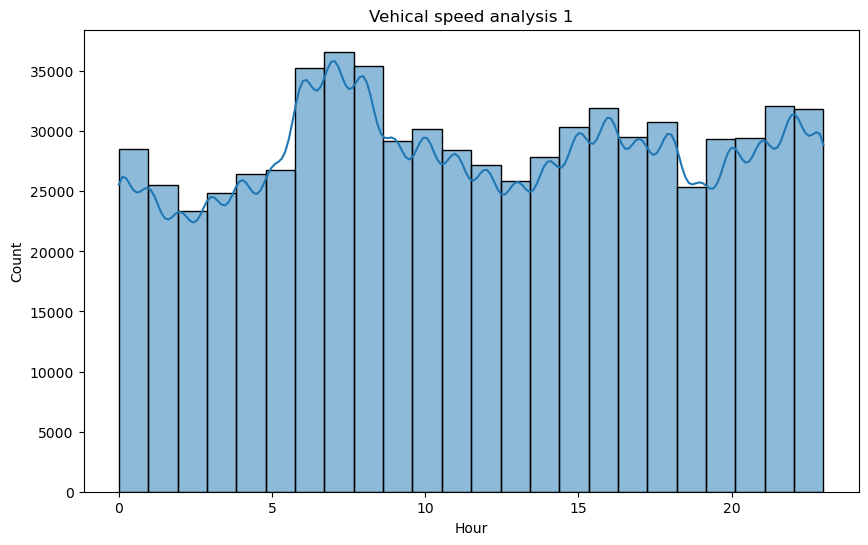

In [61]:
plt.figure(figsize=(10,6))
sns.histplot(cluster_data_0['Speed'],bins=10,kde=True)
plt.title("Vehical speed analysis cas")
plt.show()
plt.figure(figsize=(10,6))
sns.histplot(cluster_data_0['Hour'],bins=24,kde=True)
plt.title("Vehical speed analysis 1")
plt.show()

In [62]:
cluster_data_0

,Alert,Lat,Long,Vehicle,Speed,DateTime,Hour,days of week,isnight,TimeOfDay,Cluster_Label,cas_ldw_code
2,cas_ldw,17.908537,78.464064,1153.0,74,2022-05-01 00:00:11,0,6,1,Late Night,0,1
5,cas_ldw,17.321442,78.630389,2152.0,57,2022-05-01 00:00:17,0,6,1,Late Night,0,1
6,cas_ldw,17.240720,78.415225,132.0,57,2022-05-01 00:00:22,0,6,1,Late Night,0,1
9,cas_ldw,17.320832,78.627909,2152.0,54,2022-05-01 00:00:29,0,6,1,Late Night,0,1
10,cas_ldw,17.320832,78.627909,2152.0,55,2022-05-01 00:00:32,0,6,1,Late Night,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
60450,cas_ldw,17.171090,79.376733,6123.0,77,2022-05-30 23:31:41,23,0,0,Night,0,1
60451,cas_ldw,17.170157,79.382760,6123.0,76,2022-05-30 23:32:08,23,0,0,Night,0,1
60452,cas_ldw,17.168553,79.396170,6123.0,78,2022-05-30 23:33:18,23,0,0,Night,0,1
60453,cas_ldw,17.168067,79.402485,6123.0,77,2022-05-30 23:33:52,23,0,0,Night,0,1


# Statistical report by location (Speed)

## Nagpur

In [63]:
print("\ncas_ldw")
topspeedoflane=cluster_data_0[cluster_data_0['Alert']=='cas_ldw']
print(topspeedoflane['Speed'].describe())
print("\ncas_hmw")
topspeedoflane=cluster_data_0[cluster_data_0['Alert']=='cas_hmw']
print("\n",topspeedoflane['Speed'].describe())

print("\ncas_ldw")
topspeedoflane=cluster_data_0[cluster_data_0['Alert']=='cas_ldw']
print(topspeedoflane['Hour'].describe())
print("\ncas_hmw")
topspeedoflane=cluster_data_0[cluster_data_0['Alert']=='cas_hmw']
print("\n",topspeedoflane['Hour'].describe())



cas_ldw
count    543693.000000
mean         70.515160
std          10.287582
min           0.000000
25%          63.000000
50%          71.000000
75%          78.000000
max         100.000000
Name: Speed, dtype: float64

cas_hmw

 count    136664.000000
mean         47.090024
std          13.609520
min           0.000000
25%          36.000000
50%          45.000000
75%          56.000000
max         100.000000
Name: Speed, dtype: float64

cas_ldw
count    543693.000000
mean         11.458137
std           6.994303
min           0.000000
25%           6.000000
50%          11.000000
75%          17.000000
max          23.000000
Name: Hour, dtype: float64

cas_hmw

 count    136664.000000
mean         12.478239
std           6.333181
min           0.000000
25%           7.000000
50%          12.000000
75%          18.000000
max          23.000000
Name: Hour, dtype: float64


## Hyderabad

In [64]:
print("\n cas_ldw")
topspeedoflane=cluster_data_1[cluster_data_1['Alert']=='cas_ldw']
print(topspeedoflane['Speed'].describe())
print("\n cas_hmw")
topspeedoflane=cluster_data_1[cluster_data_1['Alert']=='cas_hmw']
print("\n",topspeedoflane['Speed'].describe())

print("\n cas_ldw")
topspeedoflane=cluster_data_1[cluster_data_1['Alert']=='cas_ldw']
print(topspeedoflane['Hour'].describe())
print("\n cas_hmw")
topspeedoflane=cluster_data_1[cluster_data_1['Alert']=='cas_hmw']
print("\n",topspeedoflane['Hour'].describe())



 cas_ldw
count    75081.000000
mean        62.332974
std          9.667410
min          0.000000
25%         55.000000
50%         60.000000
75%         68.000000
max        100.000000
Name: Speed, dtype: float64

 cas_hmw

 count    154799.000000
mean         35.387806
std           7.883822
min           0.000000
25%          30.000000
50%          33.000000
75%          38.000000
max         100.000000
Name: Speed, dtype: float64

 cas_ldw
count    75081.000000
mean        12.210240
std          5.135353
min          0.000000
25%          8.000000
50%         12.000000
75%         17.000000
max         23.000000
Name: Hour, dtype: float64

 cas_hmw

 count    154799.000000
mean         13.912041
std           4.136051
min           0.000000
25%          11.000000
50%          14.000000
75%          18.000000
max          23.000000
Name: Hour, dtype: float64


## Anantapur(AP)

In [65]:
print("\n cas_hmw")
topspeedoflane=cluster_data_2[cluster_data_2['Alert']=='cas_hmw']
print(topspeedoflane['Speed'].describe())
print("\n cas_pcw")
topspeedoflane=cluster_data_2[cluster_data_2['Alert']=='cas_pcw']
print("\n",topspeedoflane['Speed'].describe())

print("\n cas_hmw")
topspeedoflane=cluster_data_2[cluster_data_2['Alert']=='cas_hmw']
print(topspeedoflane['Hour'].describe())
print("\n cas_pcw")
topspeedoflane=cluster_data_2[cluster_data_2['Alert']=='cas_pcw']
print("\n",topspeedoflane['Hour'].describe())


 cas_hmw
count    48556.000000
mean        49.619965
std         12.622398
min          0.000000
25%         40.000000
50%         48.000000
75%         58.000000
max         99.000000
Name: Speed, dtype: float64

 cas_pcw

 count    3666.000000
mean       22.058647
std        12.009482
min         0.000000
25%        12.000000
50%        19.000000
75%        31.000000
max        69.000000
Name: Speed, dtype: float64

 cas_hmw
count    48556.000000
mean        12.727696
std          6.842533
min          0.000000
25%          7.000000
50%         14.000000
75%         18.000000
max         23.000000
Name: Hour, dtype: float64

 cas_pcw

 count    3666.000000
mean       13.301418
std         5.666347
min         0.000000
25%         8.000000
50%        14.000000
75%        18.000000
max        23.000000
Name: Hour, dtype: float64


## Nandigama(Vijayawada)

In [66]:
print("\n cas_ldw")
topspeedoflane=cluster_data_3[cluster_data_3['Alert']=='cas_ldw']
print(topspeedoflane['Speed'].describe())
print("\n cas_hmw")
topspeedoflane=cluster_data_3[cluster_data_3['Alert']=='cas_hmw']
print("\n",topspeedoflane['Speed'].describe())

print("\n cas_ldw")
topspeedoflane=cluster_data_3[cluster_data_3['Alert']=='cas_ldw']
print(topspeedoflane['Hour'].describe())
print("\n cas_hmw")
topspeedoflane=cluster_data_3[cluster_data_3['Alert']=='cas_hmw']
print("\n",topspeedoflane['Hour'].describe())


 cas_ldw
count    244222.000000
mean         72.887291
std          10.051031
min           0.000000
25%          66.000000
50%          73.000000
75%          80.000000
max         100.000000
Name: Speed, dtype: float64

 cas_hmw

 count    21845.000000
mean        53.213733
std         13.641942
min          0.000000
25%         43.000000
50%         53.000000
75%         63.000000
max         99.000000
Name: Speed, dtype: float64

 cas_ldw
count    244222.000000
mean          9.506056
std           8.160806
min           0.000000
25%           2.000000
50%           6.000000
75%          18.000000
max          23.000000
Name: Hour, dtype: float64

 cas_hmw

 count    21845.000000
mean        12.047242
std          7.830560
min          0.000000
25%          5.000000
50%         12.000000
75%         20.000000
max         23.000000
Name: Hour, dtype: float64


In [67]:
from scipy.stats import chi2_contingency
def chi_square_test(df):
    results = {}
    for cluster in df['Cluster_Label'].unique():
        cluster_data = df[df['Cluster_Label'] == cluster]
        contingency_table = pd.crosstab(cluster_data['Alert'], cluster_data['Long'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        results[cluster] = (chi2, p)
        print(f"Chi-Square Test for cluster {cluster}: chi2 = {chi2}, p-value = {p}")
    return results


chi_square_results = chi_square_test(df)


Chi-Square Test for cluster 3: chi2 = 800671.9734051721, p-value = 0.0
Chi-Square Test for cluster 2: chi2 = 3728065.243406701, p-value = 0.0
Chi-Square Test for cluster 0: chi2 = 4883127.6186277745, p-value = 0.0
Chi-Square Test for cluster 1: chi2 = 729413.5938822883, p-value = 0.0


In [68]:
df

,Alert,Lat,Long,Vehicle,Speed,DateTime,Hour,days of week,isnight,TimeOfDay,Cluster_Label
0,cas_ldw,14.196872,77.631213,3829.0,58,2022-05-01 00:00:06,0,6,1,Late Night,3
1,cas_ldw,16.511887,80.746034,8111.0,56,2022-05-01 00:00:07,0,6,1,Late Night,2
2,cas_ldw,17.908537,78.464064,1153.0,74,2022-05-01 00:00:11,0,6,1,Late Night,0
3,cas_ldw,13.152203,77.620431,7103.0,72,2022-05-01 00:00:11,0,6,1,Late Night,3
4,cas_ldw,16.512134,80.748452,8111.0,57,2022-05-01 00:00:15,0,6,1,Late Night,2
...,...,...,...,...,...,...,...,...,...,...,...
60482,cas_ldw,17.144550,79.600310,6123.0,79,2022-05-30 23:54:35,23,0,0,Night,2
60483,cas_ldw,17.153962,79.609060,6123.0,60,2022-05-30 23:56:21,23,0,0,Night,2
60484,cas_ldw,17.155207,79.611777,6123.0,60,2022-05-30 23:56:37,23,0,0,Night,2
60485,cas_ldw,17.155805,79.613217,6123.0,57,2022-05-30 23:56:49,23,0,0,Night,2


In [69]:
cluster_to_location = {
    0: 'Nagpur',
    1: 'Hyderabad',
    2: 'Anantapur(AP)',
    3: 'Nandigama(Vijayawada)'
}
df['Location'] = df['Cluster_Label'].map(cluster_to_location)
df

,Alert,Lat,Long,Vehicle,Speed,DateTime,Hour,days of week,isnight,TimeOfDay,Cluster_Label,Location
0,cas_ldw,14.196872,77.631213,3829.0,58,2022-05-01 00:00:06,0,6,1,Late Night,3,Nandigama(Vijayawada)
1,cas_ldw,16.511887,80.746034,8111.0,56,2022-05-01 00:00:07,0,6,1,Late Night,2,Anantapur(AP)
2,cas_ldw,17.908537,78.464064,1153.0,74,2022-05-01 00:00:11,0,6,1,Late Night,0,Nagpur
3,cas_ldw,13.152203,77.620431,7103.0,72,2022-05-01 00:00:11,0,6,1,Late Night,3,Nandigama(Vijayawada)
4,cas_ldw,16.512134,80.748452,8111.0,57,2022-05-01 00:00:15,0,6,1,Late Night,2,Anantapur(AP)
...,...,...,...,...,...,...,...,...,...,...,...,...
60482,cas_ldw,17.144550,79.600310,6123.0,79,2022-05-30 23:54:35,23,0,0,Night,2,Anantapur(AP)
60483,cas_ldw,17.153962,79.609060,6123.0,60,2022-05-30 23:56:21,23,0,0,Night,2,Anantapur(AP)
60484,cas_ldw,17.155207,79.611777,6123.0,60,2022-05-30 23:56:37,23,0,0,Night,2,Anantapur(AP)
60485,cas_ldw,17.155805,79.613217,6123.0,57,2022-05-30 23:56:49,23,0,0,Night,2,Anantapur(AP)


# the predicted safe speeds for each location(cas_ldw)

In [70]:
categorical_features = ['Location', 'Alert']
numeric_features = ['Hour', 'days of week', 'isnight']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)


model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=10, max_depth=5, random_state=42))
])


X = df[categorical_features + numeric_features]
y = df['Speed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


model.fit(X_train, y_train)


locations = df['Location'].unique()
sample_data = pd.DataFrame({
    'Location': locations,
    'Alert': ['cas_ldw',] * len(locations), 
    'Hour': [12] * len(locations),          
    'days of week': [3] * len(locations),   
    'isnight': [0] * len(locations)         
})


predicted_speeds = model.predict(sample_data)

# Combine locations and predicted speeds
predicted_speeds_df_cas_ldw = pd.DataFrame({
    'Location': locations,
    'Predicted Safe Speed': predicted_speeds
})


print(predicted_speeds_df_cas_ldw)

                Location  Predicted Safe Speed
0  Nandigama(Vijayawada)             72.534740
1          Anantapur(AP)             69.677912
2                 Nagpur             71.477930
3              Hyderabad             61.809014


In [ ]:
categorical_features = ['Location', 'Alert']
numeric_features = ['Hour', 'days of week', 'isnight']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)


model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=10, max_depth=5, random_state=42))
])


X = df[categorical_features + numeric_features]
y = df['Speed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


model.fit(X_train, y_train)


locations = df['Location'].unique()
sample_data = pd.DataFrame({
    'Location': locations,
    'Alert': ['cas_hmw'] * len(locations),  
    'Hour': [12] * len(locations),          
    'days of week': [3] * len(locations),   
    'isnight': [0] * len(locations)         
}


predicted_speeds = model.predict(sample_data)


predicted_speeds_df_cas_hmw = pd.DataFrame({
    'Location': locations,
    'Predicted Safe Speed': predicted_speeds
})


print(predicted_speeds_df_cas_hmw)

In [ ]:
df['Alert'].unique()

# the predicted safe speeds for each location(cas_pcw)

In [ ]:
categorical_features = ['Location', 'Alert']
numeric_features = ['Hour', 'days of week', 'isnight']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)


model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=10, max_depth=5, random_state=42))
])


X = df[categorical_features + numeric_features]
y = df['Speed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


model.fit(X_train, y_train)


locations = df['Location'].unique()
sample_data = pd.DataFrame({
    'Location': locations,
    'Alert': ['cas_pcw'] * len(locations),  
    'Hour': [12] * len(locations),          
    'days of week': [3] * len(locations),   
    'isnight': [0] * len(locations)         
})

# Predict in a batch
predicted_speeds = model.predict(sample_data)


predicted_speeds_df_cas_pcw = pd.DataFrame({
    'Location': locations,
    'Predicted Safe Speed': predicted_speeds
})


print(predicted_speeds_df_cas_pcw)
sample_data

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Hour'],bins=24,kde=True)
plt.title("Vehical speed analysis 1")
plt.show()

# Mode for hours (location)

In [ ]:
print("most no event by hours(Nagpur)",cluster_data_0["Hour"].mode())
print("most no event by hours(Hyderabad)",cluster_data_1["Hour"].mode())
print("most no event by hours(Anantapur)",cluster_data_2["Hour"].mode())
print("most no event by hours(Nandigama)",cluster_data_3["Hour"].mode())

# Mode for Speed (location)

In [ ]:
print("most no event by Speed(Nagpur)",cluster_data_0["Speed"].mode())
print("most no event by Speed(Hyderabad)",cluster_data_1["Speed"].mode())
print("most no event by Speed(Anantapur)",cluster_data_2["Speed"].mode())
print("most no event by Speed(Nandigama)",cluster_data_3["Speed"].mode())

# Mode for speed overall

In [ ]:
print("most no event by Speed",df["Speed"].mode())

In [ ]:
locationbyevent=df['Location'].value_counts()

In [ ]:
alert_count = df['Location'].value_counts()
fig13 = plt.figure(figsize=(10, 6))
axes13 = fig13.add_axes([0.1, 0.1, 0.9, 0.9])
axes13.barh(alert_count.index, alert_count.values, color='skyblue')
axes13.set_xlabel("Count")
axes13.set_ylabel("location")
axes13.set_title("Frequency of event")
plt.show()

In [ ]:
df

# the predicted safe speeds for each location(cas_hmw)

In [ ]:
predicted_speeds_df_cas_hmw.to_excel('predicted_speeds_df_cas_hmw.xlsx', index=False)

In [ ]:
predicted_speeds_df_cas_ldw.to_excel('predicted_speeds_df_cas_ldw.xlsx', index=False)

In [ ]:
predicted_speeds_df_cas_pcw.to_excel('predicted_speeds_df_cas_pcw.xlsx', index=False)

In [ ]:

locations = ['Nagpur', 'Hyderabad', 'Anantapur', 'Nandigama(Vijayawada)']
hours = [1, 18, 1, 7]  # Corresponding most common hours for events

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(locations, hours, color=['blue', 'green', 'red', 'purple'])

# Adding labels and title
plt.title('Most Common Hour of Events by Location')
plt.xlabel('Location')
plt.ylabel('Hour of Day')

# Display the plot
plt.show()
